<a href="https://colab.research.google.com/github/15483114/colab-notebooks/blob/main/mnist_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de algarismos escritos à mão utilizando o mnist**

# Importando dataset

In [1]:
#importando as bibliotecas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digit_mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


# Verificando dataset

In [ ]:
digit_mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

# Separando a variável target e dividindo o dataset em treino e teste 

In [3]:
(images_train, labels_train),(images_test, labels_test) = digit_mnist

In [4]:
images_train.shape

(60000, 28, 28)

In [33]:
labels_test.shape

(10000,)

In [5]:
# Verificando labels. Cada algarismo é uma label
np.unique(labels_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# **Scaling dos dados**

In [6]:
imagens_train = images_train/255
imagens_test = images_test/255

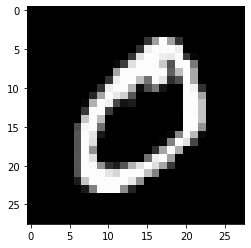

In [7]:
plt.figure()
plt.imshow(images_train[1], cmap='gray')
plt.show()

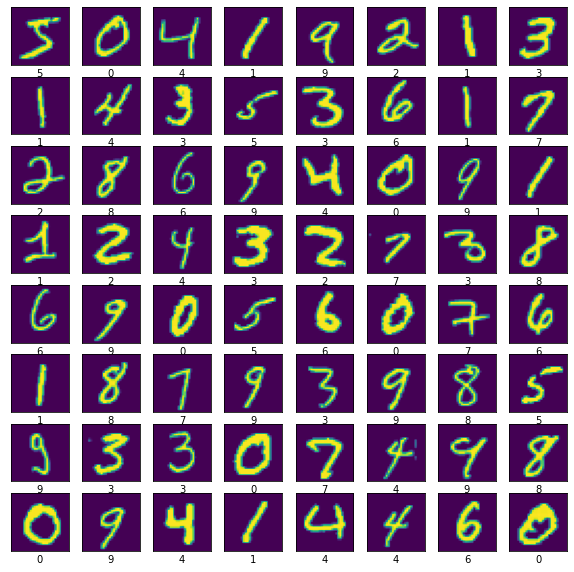

In [8]:
# Mostrando várias imagens ao mesmo tempo
plt.figure(figsize=(10,10))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(images_train[i])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(labels_train[i])
plt.show()

As labels correspondem ao algarismos

# Modelo de Deep learning

In [9]:
model = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28, 28)),
                              tf.keras.layers.Dense(128, activation='relu'),
                              tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

# Treinando o modelo com o conjunto de treinamento (60 mil imagens e labels)

In [11]:
model.fit(x=images_train, y=labels_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5401 - accuracy: 0.8604
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3826 - accuracy: 0.9143
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2863 - accuracy: 0.9324
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2455 - accuracy: 0.9391
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2174 - accuracy: 0.9448
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2234 - accuracy: 0.9465
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2035 - accuracy: 0.9512
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1873 - accuracy: 0.9539
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1902 - accuracy: 0.9533
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.183

Testando o modelo no conjunto de testes

In [12]:
test_loss, test_acc = model.evaluate(images_test, labels_test)
print(f'Acurácia do modelo no conjunto de teste: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.9520
Acurácia do modelo no conjunto de teste: 0.9520000219345093


Fazendo predições

In [13]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(images_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
# Criando funções para plotar as imagens e os gráficos de barras com as 
# probabilidades por classe
class_names = ["zero", "um", "dois", "tres", "quatro", "cinco", 
               "seis", "sete", "oito", "nove"]
def plot_image(i, predictions, true_labels, images):
  true_label, img = true_labels[i], images[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap='gray')
  probability = np.max(predictions[i])
  predicted_label = np.argmax(predictions[i])
  name_predicted_label = class_names[predicted_label]

  plt.xlabel(f'{name_predicted_label}: {100*probability:2.0f}%')


def plot_value_array(i, predictions, true_labels):
  true_label = true_labels[i]
  this_plot = plt.bar(range(10), predictions[i])
  plt.xticks(range(10))
  plt.yticks([])
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions[i])
  this_plot[predicted_label].set_color('blue')
  this_plot[true_label].set_color('red')

In [22]:
labels_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

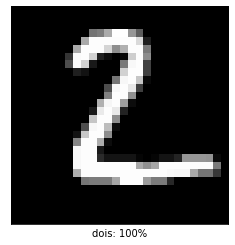

In [23]:
plot_image(1, predictions, labels_test, images_test)

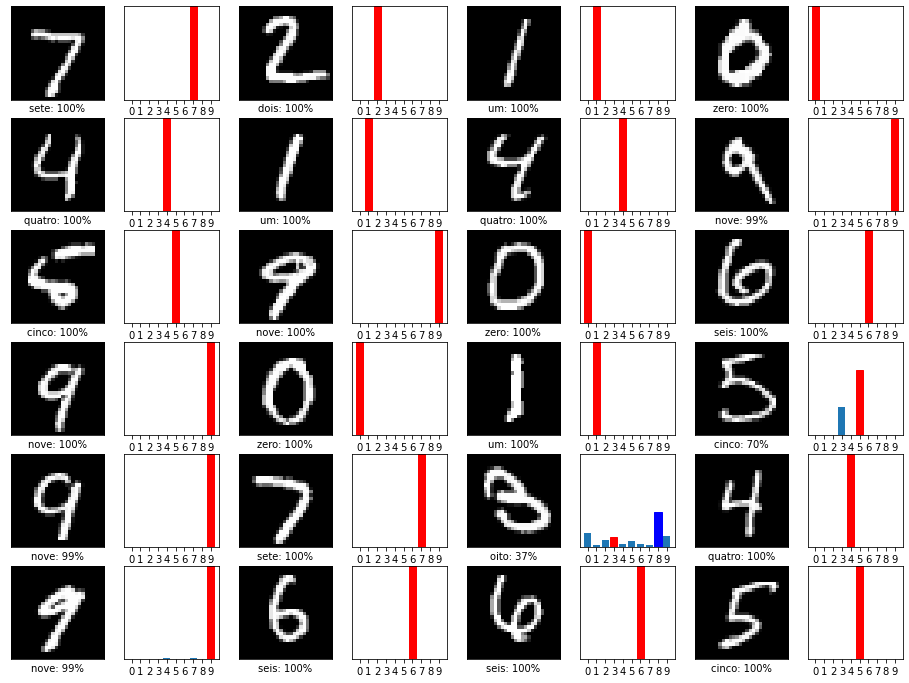

In [24]:
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, labels_test, images_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, labels_test)
plt.show()

# **CNN**

In [25]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Aqui estamos criando uma base convolucional usando um padrão comum: uma pilha de camadas Conv2D e MaxPooling2D .
Como entrada, uma CNN recebe tensores de forma (image_height, image_width, color_channels), ignorando o tamanho do lote.

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(28, (1, 1), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (1, 1), activation='relu'))

In [45]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 28)        112       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 56)        1624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 56)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 56)          3192      
                                                                 
Total params: 4,928
Trainable params: 4,928
Non-traina

Adicionando camadas no topo

In [62]:
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10))

In [47]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 28)        112       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 56)        1624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 56)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 56)          3192      
                                                                 
 flatten_3 (Flatten)         (None, 2744)             

Compilando e treinando o modelo

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(images_train, labels_train, epochs=10, 
                    validation_data=(images_test, labels_test))

Epoch 1/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.5279 - accuracy: 0.8407 - val_loss: 0.3296 - val_accuracy: 0.8991
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3094 - accuracy: 0.9003 - val_loss: 0.2865 - val_accuracy: 0.9075
Epoch 3/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2694 - accuracy: 0.9135 - val_loss: 0.2587 - val_accuracy: 0.9188
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2480 - accuracy: 0.9208 - val_loss: 0.2344 - val_accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2300 - accuracy: 0.9264 - val_loss: 0.2310 - val_accuracy: 0.9284
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2203 - accuracy: 0.9294 - val_loss: 0.2212 - val_accuracy: 0.9317
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2112 - accuracy: 0.9320 - val_loss: 0.2139 -

313/313 - 2s - loss: 0.1935 - accuracy: 0.9373 - 2s/epoch - 5ms/step


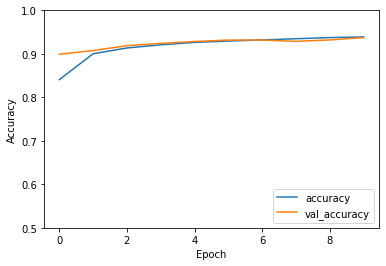

In [66]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images_test,  labels_test, verbose=2)